# KALMAN FILTERING

Kalman filtering is a powerful algorithm used in control systems and signal processing to estimate the state of a system over time. It's particularly useful when dealing with noisy measurements and uncertainties.

*The Kalman filter operates in two main phases: Prediction and Update.*

Prediction Phase: The filter predicts the next state of the system based on the current state and a state transition model.

Update Phase: When a new measurement is taken, the filter updates its prediction using a weighted average, giving more weight to estimates with greater certainty

In [2]:
import numpy as np

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, P, x):
        self.A = A  # State transition matrix
        self.B = B  # Control matrix
        self.H = H  # Observation matrix
        self.Q = Q  # Process noise covariance
        self.R = R  # Measurement noise covariance
        self.P = P  # Estimate error covariance
        self.x = x  # Initial state estimate

    def predict(self, u=0):
        # Predicted state estimate
        self.x = np.dot(self.A, self.x) + np.dot(self.B, u)
        # Predicted estimate covariance
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):
        # Innovation or measurement residual
        y = z - np.dot(self.H, self.x)
        # Innovation covariance
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        # Optimal Kalman gain
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        # Updated state estimate
        self.x = self.x + np.dot(K, y)
        # Updated estimate covariance
        I = np.eye(self.A.shape[1])  # Identity matrix
        self.P = np.dot((I - np.dot(K, self.H)), self.P)
        return self.x

# Define matrices for a simple example
A = np.array([[1, 1], [0, 1]])  # State transition matrix
B = np.array([[0.5], [1]])  # Control input matrix
H = np.array([[1, 0]])  # Observation matrix
Q = np.array([[1, 0], [0, 1]])  # Process noise covariance
R = np.array([[1]])  # Measurement noise covariance
P = np.array([[1, 0], [0, 1]])  # Estimate error covariance
x = np.array([[0], [0]])  # Initial state

# Create an instance of the KalmanFilter
kf = KalmanFilter(A, B, H, Q, R, P, x)

# Simulate some measurements
measurements = [1, 2, 3]

for z in measurements:
    kf.predict()
    print(f'Updated state: {kf.update(z)}')

Updated state: [[0.75]
 [0.25]]
Updated state: [[1.8 ]
 [0.65]]
Updated state: [[2.9009009 ]
 [0.88288288]]


# GUASSIAN FILTERING

Gaussian Filtering, also known as Gaussian Smoothing, is a technique used to reduce noise and detail in an image. 
It works by applying a Gaussian function to blur the image and is widely used in image processing for noise reduction and blurring.

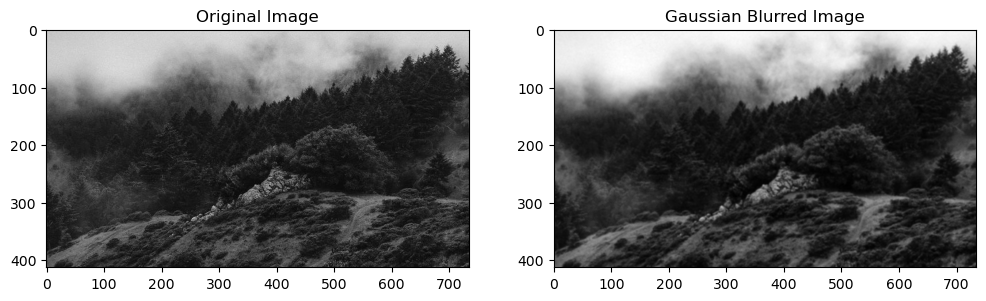

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load an example image
image = cv2.imread('Lush landscape.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the original and blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.show()


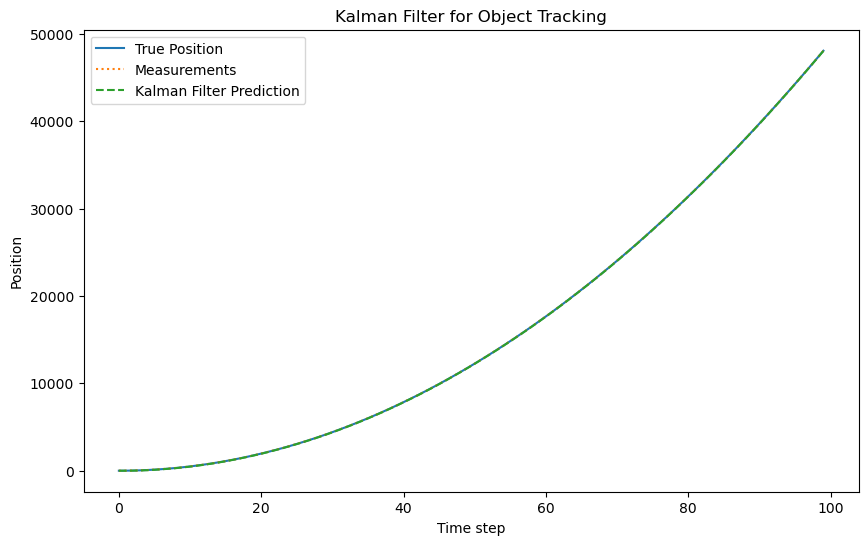

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, P, x):
        self.A = A
        self.B = B
        self.H = H
        self.Q = Q
        self.R = R
        self.P = P
        self.x = x

    def predict(self, u=0):
        self.x = np.dot(self.A, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        self.P = np.dot(np.eye(self.A.shape[1]) - np.dot(K, self.H), self.P)
        return self.x

# Parameters
dt = 1.0  # time step
A = np.array([[1, dt], [0, 1]])  # state transition matrix
B = np.array([[0.5 * dt**2], [dt]])  # control input matrix
H = np.array([[1, 0]])  # observation matrix
Q = np.array([[1, 0], [0, 1]])  # process noise covariance
R = np.array([[10]])  # measurement noise covariance
P = np.array([[1, 0], [0, 1]])  # estimate error covariance
x = np.array([[0], [1]])  # initial state [position, velocity]

kf = KalmanFilter(A, B, H, Q, R, P, x)

# Simulated measurements (noisy)
true_positions = []
measurements = []
predicted_positions = []

for t in range(100):
    true_position = 0.5 * 9.81 * (t ** 2)  # true position under constant acceleration
    measurement = true_position + np.random.randn() * np.sqrt(R[0, 0])
    kf.predict()
    predicted_position = kf.update(measurement)[0, 0]

    true_positions.append(true_position)
    measurements.append(measurement)
    predicted_positions.append(predicted_position)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(true_positions, label='True Position')
plt.plot(measurements, label='Measurements', linestyle='dotted')
plt.plot(predicted_positions, label='Kalman Filter Prediction', linestyle='dashed')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.legend()
plt.title('Kalman Filter for Object Tracking')
plt.show()


# APPLICATIONS OF KALMAN FILTERING

1. Navigation Systems 